In [4]:
%matplotlib qt4
# %matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
from params import subject_ids, sessions
from params import main_path, data_path, preproc_pipeline_name
from ipywidgets import widgets
from IPython.display import display, clear_output, Javascript
import mne
from mne.io import read_raw_fif
from mne.preprocessing import read_ica
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
import numpy as np
import getpass
import os
# Widget related imports
from traitlets import Unicode
# nbconvert related imports
from nbconvert import get_export_names, export_by_name
from nbconvert.writers import FilesWriter
from nbformat import read, NO_CONVERT
from nbconvert.utils.exceptions import ConversionException
warnings.filterwarnings('ignore')

## Choose subject ID:

In [6]:
name_sel = widgets.Select(
    description='Subject ID:',
    options=subject_ids
)
display(name_sel)

cond_sel = widgets.RadioButtons(
    description='Condition:',
    options=sessions,
)
display(cond_sel)

In [7]:
%%capture
if cond_sel.value == sessions[0]:
    session = sessions[0]
elif cond_sel.value == sessions[1]:
    session = sessions[1]
subj_ID = name_sel.value

# --------------------------------------------------- #

data_path = os.path.join(main_path, subj_ID)
pipeline_path = os.path.join(main_path, preproc_pipeline_name)
sbj_data_path = os.path.join(main_path, subj_ID, session, 'meg')

basename = subj_ID + '_task-rest_run-01_meg_short_raw_filt_dsamp'
results_folder = os.path.join('preproc_meeg', '_sess_index_' + session + '_subject_id_' + subj_ID)

ica_fname = basename + '_ica.fif'
new_ica_fname = basename + '_ica-raw.fif'
ica_TS_fname = basename + '_ica-tseries.fif'
report_fname = basename + '-report.html'
ica_solution_fname = basename + '_ica_solution.fif'

raw_ica_file = os.path.join(pipeline_path, results_folder, 'ica', ica_fname)
new_raw_ica_file = os.path.join(sbj_data_path, new_ica_fname)
ica_TS_file = os.path.join(pipeline_path, results_folder, 'ica', ica_TS_fname)
ica_solution_file = os.path.join(pipeline_path, results_folder, 'ica', ica_solution_fname)
report_file = os.path.join(pipeline_path, results_folder, 'ica', report_fname)

# Load data
raw = read_raw_fif(raw_ica_file, preload=True)
ica = read_ica(ica_solution_file)
ica.labels_ = dict()
ica_TS = ica.get_sources(raw)

## Cell below opens an html report in a web-browser

In [8]:
sbj_data_path

'/run/media/pasca/paska/meg_data/omega/sample_BIDS_omega/sub-0002/ses-0001/meg'

In [9]:
new_raw_ica_file

'/run/media/pasca/paska/meg_data/omega/sample_BIDS_omega/sub-0002/ses-0001/meg/sub-0002_task-rest_run-01_meg_short_raw_filt_dsamp_ica-raw.fif'

In [7]:
%%bash -s "$report_file"
firefox -new-window $1

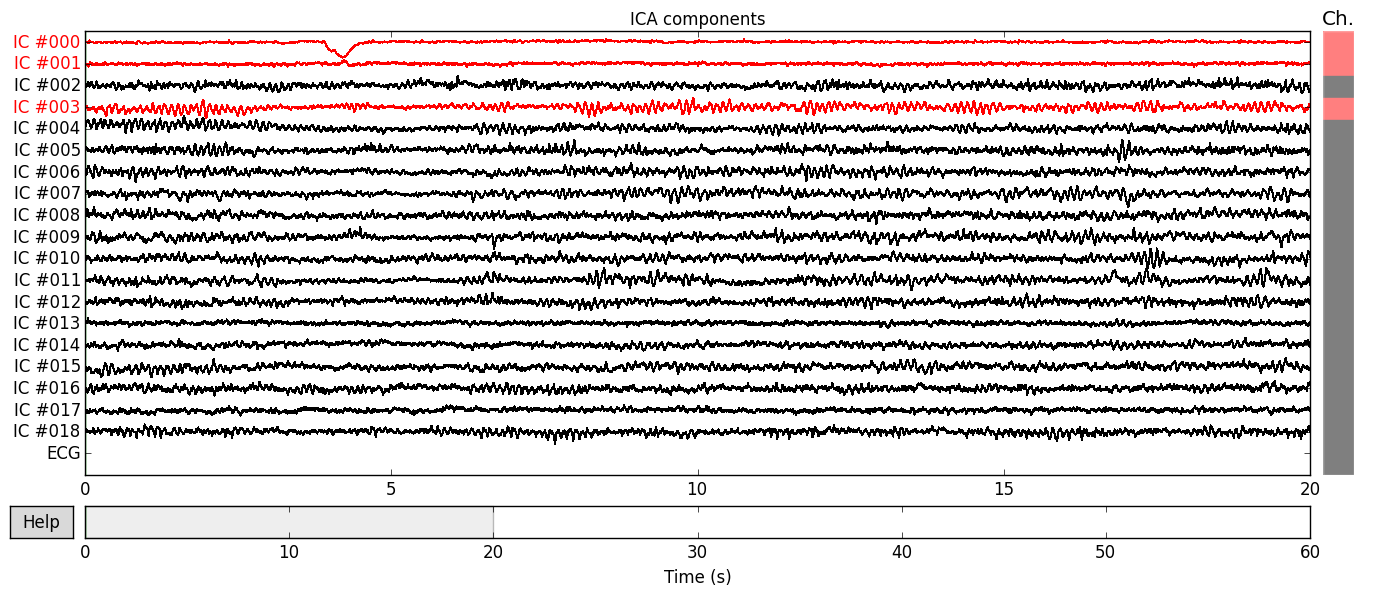

In [10]:
ica.plot_sources(raw)

In [11]:
ica.plot_components(inst=raw)

In [12]:
# ica.exclude
if ica.exclude:
    ica.plot_properties(raw, picks=ica.exclude)

## Exclude ICA components

To exclude/include an ICA component click on mne_browse window: the red ones will be excluded. To keep the new excluded ICA components CLOSE the mne_browe window!

In [ ]:
ica.exclude

## Apply ica solution to raw data and save the result

In [ ]:
%%capture
ica.apply(raw)
raw.save(new_raw_ica_file, overwrite=True)
ica.save(ica_solution_file)

In [ ]:
ica.exclude

In [ ]:
new_raw_ica_file